In [1]:
import os
import sys

sys.path.append(os.path.abspath('..'))

import modules.io as io
import modules.vessel_regression as vessel_regression
import numpy as np
import skimage.filters as filters
import skimage.feature as feature
import matplotlib.pyplot as plt

In [2]:
DATA_KEY    = "VAL"
CONFIG_FILE = "../config/googlenet_zoom_c30_train300k_aug10_clean.yaml"

config      = io.load_yaml(CONFIG_FILE)

In [3]:
import factories.dataset_factory as dataset_factory

data    = dataset_factory.get(config, DATA_KEY)

231it [00:00, 3961.97it/s]
  0%|          | 0/231 [00:00<?, ?it/s]

centering images


100%|██████████| 231/231 [00:03<00:00, 73.12it/s]


In [4]:
X = data[0]
C = data[1]
N = X.shape[0]
print(X.shape)
print(C[150])

(231, 160, 160)
(array([0.45775313, 0.47180162, 0.49299788, 0.50739298, 0.50386232,
       0.48987683, 0.47918272, 0.47997236, 0.49523141, 0.52536908,
       0.56369296, 0.58791835, 0.57735765, 0.54302082, 0.50494346,
       0.47300494, 0.45059449, 0.43789324, 0.43437187, 0.43958   ,
       0.45271364, 0.47335692, 0.50002548, 0.53071253, 0.5579836 ,
       0.56730468, 0.54828021, 0.51268817, 0.4800604 , 0.46105629]), array([0.49029607, 0.5064145 , 0.24684659], dtype=float32))


67
[0.4992695  0.5058036  0.49174613]


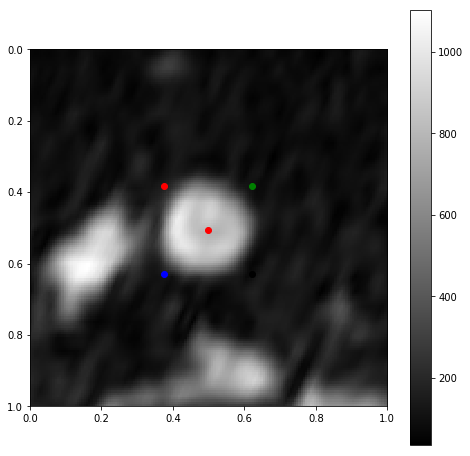

In [27]:
i = np.random.randint(N)
print(i)
x = X[i]

p = C[i][1]
print(p)
d = p[2]

plt.figure(figsize=(8,8))
plt.imshow(x,cmap='gray', extent=[0, 1, 1, 0])
plt.plot([p[0]],[p[1]],linestyle='',marker='o',color='r')

plt.plot([p[0]-d/4],[p[1]-d/4],linestyle='',marker='o',color='r')
plt.plot([p[0]+d/4],[p[1]-d/4],linestyle='',marker='o',color='g')
plt.plot([p[0]-d/4],[p[1]+d/4],linestyle='',marker='o',color='b')
plt.plot([p[0]+d/4],[p[1]+d/4],linestyle='',marker='o',color='k')

plt.colorbar()
plt.show()